In [ ]:
#Training module

In [246]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
youtube_data=pd.read_csv("C:/Users/anu nain/Downloads/shivani.csv")
youtube_data.head()
youtube_data.shape



(14999, 9)

In [247]:
category={'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8}
youtube_data["category"]=youtube_data["category"].map(category)
youtube_data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,9/14/2016,PT7M37S,6
1,VID_14135,2,1707,56,2,6,10/1/2016,PT9M30S,4
2,VID_2187,1,2023,25,0,2,7/2/2016,PT2M16S,3
3,VID_23096,6,620860,777,161,153,7/27/2016,PT4M22S,8
4,VID_10175,1,666,1,0,0,6/29/2016,PT31S,4


In [248]:
youtube_data=youtube_data[youtube_data.views!='F']
youtube_data=youtube_data[youtube_data.likes!='F']
youtube_data=youtube_data[youtube_data.dislikes!='F']
youtube_data=youtube_data[youtube_data.comment!='F']
youtube_data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,9/14/2016,PT7M37S,6
1,VID_14135,2,1707,56,2,6,10/1/2016,PT9M30S,4
2,VID_2187,1,2023,25,0,2,7/2/2016,PT2M16S,3
3,VID_23096,6,620860,777,161,153,7/27/2016,PT4M22S,8
4,VID_10175,1,666,1,0,0,6/29/2016,PT31S,4


In [249]:
youtube_data["views"]=pd.to_numeric(youtube_data["views"])
youtube_data["comment"]=pd.to_numeric(youtube_data["comment"])
youtube_data["likes"]=pd.to_numeric(youtube_data["likes"])
youtube_data["dislikes"]=pd.to_numeric(youtube_data["dislikes"])
youtube_data["adview"]=pd.to_numeric(youtube_data["adview"])
column_vidid=youtube_data['vidid']

In [250]:
from sklearn.preprocessing import LabelEncoder
youtube_data['duration']=LabelEncoder().fit_transform(youtube_data['duration'])
youtube_data['vidid']=LabelEncoder().fit_transform(youtube_data['vidid'])
youtube_data['published']=LabelEncoder().fit_transform(youtube_data['published'])
youtube_data.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2235,2925,6
1,2741,2,1707,56,2,6,207,3040,4
2,8138,1,2023,25,0,2,1905,1863,3
3,9005,6,620860,777,161,153,1952,2546,8
4,122,1,666,1,0,0,1783,1963,4


In [251]:
import datetime
import time
def checki(x):
     y = x[2:]
     h = ''
     m = ''
     s = ''
     mm = ''
     P = ['H','M','S']
     for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
     if(h==''):
        h = '00'
     if(m == ''):
        m = '00'
     if(s==''):
        s='00'
     bp = h+':'+m+':'+s
     return bp
train=pd.read_csv("C:/Users/anu nain/Downloads/shivani.csv")
mp = pd.read_csv("C:/Users/anu nain/Downloads/shivani.csv")["duration"]
time = mp.apply(checki)
def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
youtube_data["duration"]=time1
youtube_data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2235,457,6
1,2741,2,1707,56,2,6,207,570,4
2,8138,1,2023,25,0,2,1905,136,3
3,9005,6,620860,777,161,153,1952,262,8
4,122,1,666,1,0,0,1783,31,4


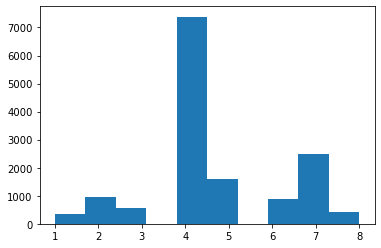

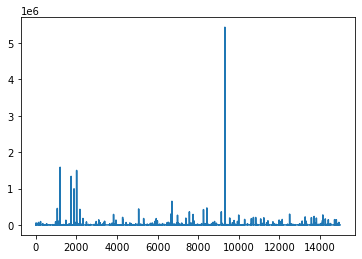

In [252]:
plt.hist(youtube_data["category"])
plt.show()
plt.plot(youtube_data["adview"])
plt.show()

In [253]:
youtube_data=youtube_data[youtube_data["adview"]<1500000]

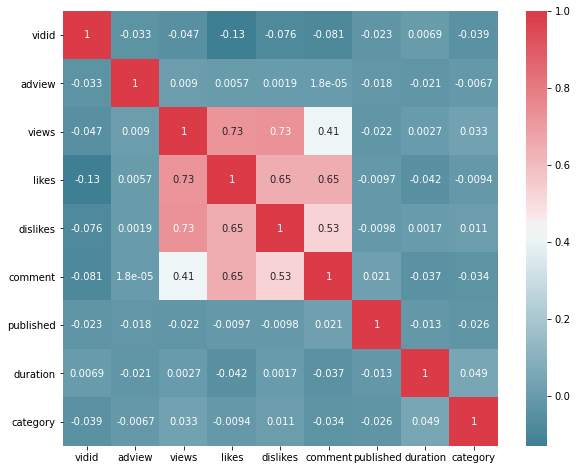

In [254]:
import seaborn as sns
f,ax=plt.subplots(figsize=(10,8))
corr=youtube_data.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax,annot=True)
plt.show()

In [255]:
Y_train = pd.DataFrame(data = youtube_data.iloc[:, 1].values, columns = ['target'])
youtube_data=youtube_data.drop(["adview"],axis=1)
youtube_data=youtube_data.drop(["vidid"],axis=1)
youtube_data.head()



,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2235,457,6
1,1707,56,2,6,207,570,4
2,2023,25,0,2,1905,136,3
3,620860,777,161,153,1952,262,8
4,666,1,0,0,1783,31,4


In [256]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(youtube_data, Y_train, test_size=0.2, random_state=42)
X_train.shape

(11708, 7)

In [257]:
X_train

,views,likes,dislikes,comment,published,duration,category
11726,7862,52,1,2,1416,886,4
3011,41604,531,7,40,971,197,7
1889,87631,1027,40,80,2013,241,5
7691,3846,1,0,0,2124,7797,4
1305,192344,1028,16,39,1161,669,4
...,...,...,...,...,...,...,...
5317,183265,398,28,32,167,393,4
13749,244294,416,262,19,871,654,5
5523,561120,2007,107,135,1206,285,7
883,1361366,1384,757,185,2103,240,7


In [258]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.16012952249085932

In [259]:
from sklearn import metrics
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))



In [260]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)
linear_regression.predict(X_test)


Mean Absolute Error: 3140.921374904903
Mean Squared Error: 1018088981.4735099
Root Mean Squared Error: 31907.506663377975


array([[1102.86778482],
       [-945.98082418],
       [1085.47793962],
       ...,
       [1210.03266473],
       [1232.1858529 ],
       [1102.83412974]])

In [261]:
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

C:\Users\anu nain\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Mean Absolute Error: 3140.921374904903
Mean Squared Error: 1018088981.4735099
Root Mean Squared Error: 31907.506663377975


In [262]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 2910.3218312265117
Mean Squared Error: 1150502120.5138366
Root Mean Squared Error: 33919.05247075509


In [263]:
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")

['decisiontree_youtubeadview.pkl']

In [264]:
#Prediction module

In [265]:
test_data=pd.read_csv("C:/Users/anu nain/Downloads/test.csv")
test_data.head()
test_data.shape

(8764, 8)

In [266]:
category={'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8}
test_data["category"]=test_data["category"].map(category)
test_data.head()


,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2/18/2017,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,6/28/2016,PT6M29S,6
2,VID_13967,28534,31,11,1,3/10/2014,PT37M54S,4
3,VID_19442,1316715,2284,250,274,6/5/2010,PT9M55S,7
4,VID_770,1893173,2519,225,116,9/3/2016,PT3M8S,2


In [267]:
test_data=test_data[test_data.views!='F']
test_data=test_data[test_data.likes!='F']
test_data=test_data[test_data.dislikes!='F']
test_data=test_data[test_data.comment!='F']
test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2/18/2017,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,6/28/2016,PT6M29S,6
2,VID_13967,28534,31,11,1,3/10/2014,PT37M54S,4
3,VID_19442,1316715,2284,250,274,6/5/2010,PT9M55S,7
4,VID_770,1893173,2519,225,116,9/3/2016,PT3M8S,2


In [268]:
test_data["views"]=pd.to_numeric(test_data["views"])
test_data["comment"]=pd.to_numeric(test_data["comment"])
test_data["likes"]=pd.to_numeric(test_data["likes"])
test_data["dislikes"]=pd.to_numeric(test_data["dislikes"])

column_vidid=test_data['vidid']

In [269]:
from sklearn.preprocessing import LabelEncoder
test_data['duration']=LabelEncoder().fit_transform(test_data['duration'])
test_data['vidid']=LabelEncoder().fit_transform(test_data['vidid'])
test_data['published']=LabelEncoder().fit_transform(test_data['published'])
test_data.head()


,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,819,2115,2
1,3444,1040132,8171,340,1047,1565,2055,6
2,1593,28534,31,11,1,937,1506,4
3,3775,1316715,2284,250,274,1587,2265,7
4,7644,1893173,2519,225,116,2065,1625,2


In [270]:
import datetime
import time
def checki(x):
     y = x[2:]
     h = ''
     m = ''
     s = ''
     mm = ''
     P = ['H','M','S']
     for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
     if(h==''):
        h = '00'
     if(m == ''):
        m = '00'
     if(s==''):
        s='00'
     bp = h+':'+m+':'+s
     return bp
train=pd.read_csv("C:/Users/anu nain/Downloads/test.csv")
mp = pd.read_csv("C:/Users/anu nain/Downloads/test.csv")["duration"]
time = mp.apply(checki)
def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
test_data["duration"]=time1
test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,819,449,2
1,3444,1040132,8171,340,1047,1565,389,6
2,1593,28534,31,11,1,937,2274,4
3,3775,1316715,2284,250,274,1587,595,7
4,7644,1893173,2519,225,116,2065,188,2


In [271]:
test_data=test_data.drop(["vidid"],axis=1)

In [272]:
Y_train = pd.DataFrame(data = test_data.iloc[:, 1].values, columns = ['target'])

In [273]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(test_data, Y_train, test_size=0.001, random_state=42)
X_train.shape

(8540, 7)

In [274]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.15957132864930507

In [275]:
import joblib
model=joblib.load("decisiontree_youtubeadview.pkl")


In [276]:
prediction = model.predict(X_train)
print(prediction)

[3. 1. 1. ... 1. 3. 6.]


In [277]:
prediction=pd.DataFrame(prediction,columns=['prediction']).to_csv('predict.csv')